<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

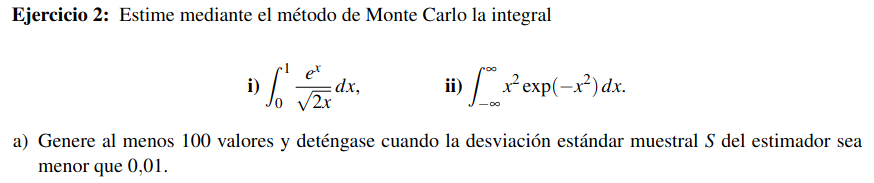

In [40]:
import numpy as np
from random import random, seed
from scipy.integrate import quad
import numpy as np

seed(1)

def integral_1(x):
  return np.where((0 <= x) & (x <= 1), np.e**x / np.sqrt(2*x),0)

def integral_2_inf(x):
  return x**2 * np.exp(-x**2)

def integral_2(x):
  return np.where((0 <= x) & (x <= 1), 2 * integral_2_inf(x/(1-x))*(1/(1-x)**2),0)

# funciones generalizadas:
def gen_integral(integral, intervalo):
  a, b = intervalo
  n = b - a
  while True:
    x = random() * n + a
    yield integral(x)

def estimar_muestreador(muestreador, d):
  #Estimacion de E[X] con desvıo estandar d
  media = next(muestreador)
  Scuad, n = 0, 1 #Scuad = Sˆ2(1)

  while n <= 100 or np.sqrt(Scuad/n) > d:
    n += 1
    nueva_muestra = next(muestreador)
    media_anterior = media
    media = media_anterior + (nueva_muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_anterior)**2
  return media, Scuad, np.sqrt(Scuad), n

In [41]:
resultado, error = quad(integral_1, 0, 1)
media, Scuad, S, n = estimar_muestreador(gen_integral(integral_1, [0, 1]), 0.01)

print("integral 1:")
print("Real:")
print("Área bajo la curva:", resultado)
print("Estimacion:")
print(f"Area bajo la curva: {media:.4f} Iteraciones: {n}")

integral 1:
Real:
Área bajo la curva: 2.0685019360906236
Estimacion:
Area bajo la curva: 2.0809 Iteraciones: 29837


In [42]:
resultado, error = quad(integral_2_inf, -np.inf, np.inf)
media, Scuad, S, n = estimar_muestreador(gen_integral(integral_2, [0, 1]), 0.01)

print("integral 2:")
print("Real:")
print("Área bajo la curva:", resultado)
print("Estimacion:")
print(f"Area bajo la curva: {media:.4f} Iteraciones: {n}")

integral 2:
Real:
Área bajo la curva: 0.8862269254527599
Estimacion:
Area bajo la curva: 0.8895 Iteraciones: 12819
